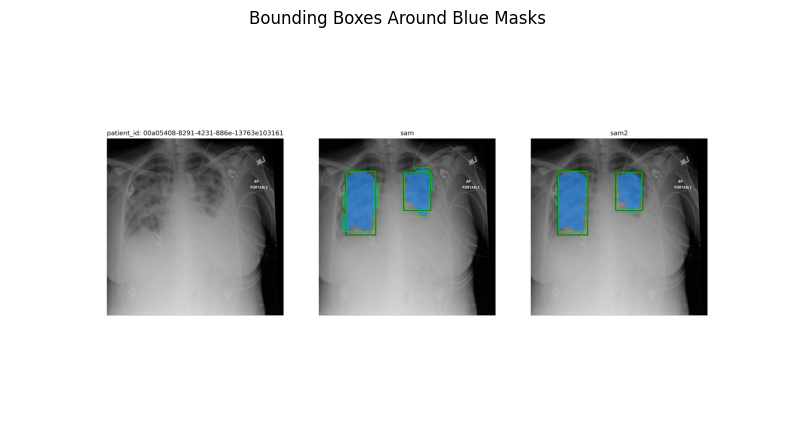

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/00a05408-8291-4231-886e-13763e103161_sam2_masked.png'
image = cv2.imread(image_path)

# Convert to HSV to detect the blue color
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the blue color range in HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

# Create a mask to isolate the blue areas
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around each contour
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Draw a green bounding box

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Bounding Boxes Around Blue Masks")
plt.axis('off')
plt.show()





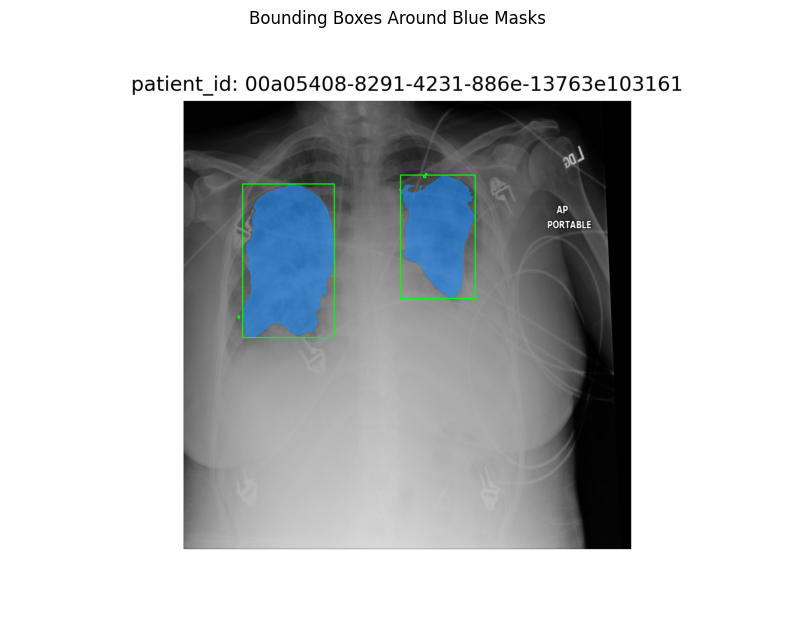

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/00a05408-8291-4231-886e-13763e103161_sam_masked.png'
image = cv2.imread(image_path)

# Convert to HSV to detect the blue color
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the blue color range in HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

# Create a mask to isolate the blue areas
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around each contour
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Draw a green bounding box

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Bounding Boxes Around Blue Masks")
plt.axis('off')
plt.show()





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

def process_image(image_path, output_folder, min_area=250):
    """Process a single image to detect blue masks and draw bounding boxes for the largest mask only."""
    print(f"Processing image: {image_path}")

    # Read the image
    image = cv2.imread(str(image_path))

    if image is None:
        print(f"Error: Failed to read image at {image_path}")
        return

    # Convert to HSV to detect the blue color
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the blue color range in HSV
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])

    # Create a mask to isolate the blue areas
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by minimum area and find the largest one
    largest_contour = None
    max_area = 0

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:  # Only consider contours larger than the minimum area
            if area > max_area:
                max_area = area
                largest_contour = contour

    # Draw the largest bounding box if it exists
    if largest_contour is not None:
        x, y, w, h = cv2.boundingRect(largest_contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green bounding box
    else:
        print(f"No sufficiently large blue areas found in image: {image_path}")

    # Save the result to the output folder
    output_path = output_folder / image_path.name
    cv2.imwrite(str(output_path), image)
    print(f"Processed and saved: {output_path}")

def process_folder(input_folder, output_folder):
    """Process all PNG images in the input folder."""
    input_folder = Path(input_folder)
    output_folder = Path(output_folder)

    # Check if the input folder exists
    if not input_folder.exists():
        print(f"Error: Input folder {input_folder} does not exist")
        return

    # Create the output folder if it doesn't exist
    output_folder.mkdir(parents=True, exist_ok=True)

    # Get a list of all PNG files in the input folder
    png_files = list(input_folder.glob('*.png'))

    # Check if there are any PNG files
    if len(png_files) == 0:
        print(f"No PNG files found in folder: {input_folder}")
        return

    # Iterate through all PNG files in the input folder
    for image_path in png_files:
        process_image(image_path, output_folder)

# Path to the folder containing the PNG images
input_folder = '/content/drive/MyDrive/clahe_canny_images-selected'
output_folder = '/content/drive/MyDrive/clahe_canny_images-selected'

# Process all images in the folder
process_folder(input_folder, output_folder)


Processing image: /content/drive/MyDrive/clahe_canny_images-selected/fe71c437-e46b-406c-8870-3b2298fc7d3a_sam2_masked.png
Processed and saved: /content/drive/MyDrive/clahe_canny_images-selected/fe71c437-e46b-406c-8870-3b2298fc7d3a_sam2_masked.png
Processing image: /content/drive/MyDrive/clahe_canny_images-selected/fea6191a-f4d4-4cc6-8bf7-5e81bd097209_sam2_masked.png
Processed and saved: /content/drive/MyDrive/clahe_canny_images-selected/fea6191a-f4d4-4cc6-8bf7-5e81bd097209_sam2_masked.png
Processing image: /content/drive/MyDrive/clahe_canny_images-selected/ff9d37d1-3660-4187-8f57-d31f9c91a3fd_sam2_masked.png
Processed and saved: /content/drive/MyDrive/clahe_canny_images-selected/ff9d37d1-3660-4187-8f57-d31f9c91a3fd_sam2_masked.png
Processing image: /content/drive/MyDrive/clahe_canny_images-selected/fe5e5a88-1f1d-4abf-9a40-03517c3260ba_sam2_masked.png
Processed and saved: /content/drive/MyDrive/clahe_canny_images-selected/fe5e5a88-1f1d-4abf-9a40-03517c3260ba_sam2_masked.png
Processing i